In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
think_data = pd.read_csv('think_aloud_cleaned_10_2.csv')
data = pd.DataFrame()

In [4]:
def parse_tags(tags):
    parsed_tags = []
    for tag in tags:
        if type(tag) == str:
            parsed_tags.append(tag.split(', '))
        else:
            parsed_tags.append(tag) # handling NaNs, maybe do another way
    return parsed_tags

users = ['user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6', 'user_7', 'user_8', 'user_9', 
         'user_10', 'user_11', 'user_12', 'user_13', 'user_14', 'user_15', 'user_16']
data['b_b_tags'] = parse_tags([think_data[user][3] for user in users])
data['c_b_tags'] = parse_tags([think_data[user][5] for user in users])
data['e_b_tags'] = parse_tags([think_data[user][7] for user in users])
data['f_b_tags'] = parse_tags([think_data[user][9] for user in users])
data['g_b_tags'] = parse_tags([think_data[user][11] for user in users])
#
data['b_bp_tags'] = parse_tags([think_data[user][13] for user in users])
data['c_c_tags'] = parse_tags([think_data[user][15] for user in users])
data['e_sm_tags'] = parse_tags([think_data[user][17] for user in users])
data['f_od_tags'] = parse_tags([think_data[user][19] for user in users])
data['g_sd_tags'] = parse_tags([think_data[user][21] for user in users])
#
data['b_c_tags'] = parse_tags([think_data[user][23] for user in users])
data['c_sm_tags'] = parse_tags([think_data[user][25] for user in users])
data['e_od_tags'] = parse_tags([think_data[user][27] for user in users])
data['f_sd_tags'] = parse_tags([think_data[user][29] for user in users])
data['g_bp_tags'] = parse_tags([think_data[user][31] for user in users])
#
data['b_sm_tags'] = parse_tags([think_data[user][33] for user in users])
data['c_od_tags'] = parse_tags([think_data[user][35] for user in users])
data['e_sd_tags'] = parse_tags([think_data[user][37] for user in users])
data['f_bp_tags'] = parse_tags([think_data[user][39] for user in users])
data['g_c_tags'] = parse_tags([think_data[user][41] for user in users])
#
data['b_od_tags'] = parse_tags([think_data[user][43] for user in users])
data['c_sd_tags'] = parse_tags([think_data[user][45] for user in users])
data['e_bp_tags'] = parse_tags([think_data[user][47] for user in users])
data['f_c_tags'] = parse_tags([think_data[user][49] for user in users])
data['g_sm_tags'] = parse_tags([think_data[user][51] for user in users])
#
data['b_sd_tags'] = parse_tags([think_data[user][53] for user in users])
data['c_bp_tags'] = parse_tags([think_data[user][55] for user in users])
data['e_c_tags'] = parse_tags([think_data[user][57] for user in users])
data['f_sm_tags'] = parse_tags([think_data[user][59] for user in users])
data['g_od_tags'] = parse_tags([think_data[user][61] for user in users])

In [5]:
# for each view type, how much was each strategy used?
#tags = ['difficulty', 'doubt', 'colors', 'forecast', 'distance', 'size/area/shape', 'comparison', 'proportion', 
#        'potential', 'cases', 'speculate', 'external']

tags = [
    'difficulty', 'doubt', 'speculate', 'external', 'forecast', 'comparison', 'size/area/shape', 'distance', 'colors','potential', 'cases', 'proportion'
]

# leave out 'identify'

reasoning_data = {
    'b': {},
    'bp': {},
    'c': {},
    'sm': {},
    'od': {},
    'sd': {}
}

for view in reasoning_data:
    views = ['b_' + view + '_tags', 'c_' + view + '_tags', 'e_' + view + '_tags', 'f_' + view + '_tags', 'g_' + view + '_tags']
    for v in views:
        comments = data[v].values
        for comment in comments:
            if type(comment) == list:
                for item in comment:
                    if item in reasoning_data[view]:
                        reasoning_data[view][item] += 1
                    else:
                        reasoning_data[view][item] = 1
                    
print(reasoning_data)

{'b': {'colors': 2, 'external': 3, 'distance': 17, 'identify': 20, 'forecast': 9, 'size/area/shape': 10, 'proportion': 2, 'doubt': 1, 'comparison': 6, 'potential': 2, 'difficulty': 2, 'speculate': 1}, 'bp': {'identify': 30, 'size/area/shape': 6, 'doubt': 10, 'speculate': 17, 'distance': 12, 'external': 2, 'potential': 1, 'forecast': 2, 'comparison': 3}, 'c': {'forecast': 8, 'potential': 20, 'identify': 20, 'size/area/shape': 7, 'distance': 5, 'proportion': 2, 'external': 2, 'cases': 7, 'comparison': 1, 'speculate': 1, 'difficulty': 1}, 'sm': {'proportion': 19, 'distance': 1, 'comparison': 1, 'identify': 20, 'size/area/shape': 3, 'compare': 1, 'cases': 18, 'difficulty': 5, 'doubt': 1, 'colors': 1, 'external': 2, 'potential': 5, 'personal/external': 1, 'speculate': 2, 'forecast': 1}, 'od': {'distance': 2, 'size/area/shape': 2, 'proportion': 12, 'identify': 25, 'colors': 11, 'difficulty': 8, 'external': 4, 'cases': 1, 'comparison': 9, 'compare': 2, 'qualitative': 1, 'speculate': 1, 'forec

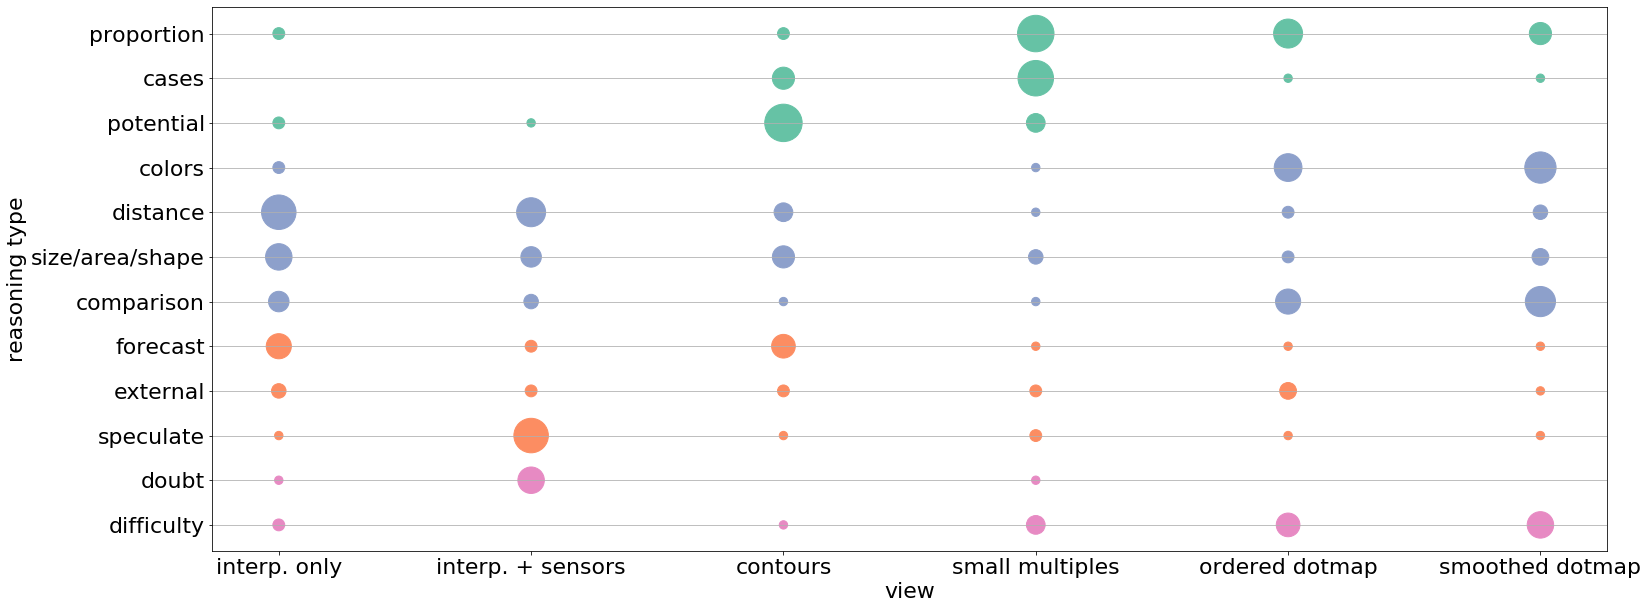

In [9]:
data_view = []
data_comment = []
data_count = []
colors = []
prob_color = '#66c2a5'
default_color = '#fc8d62'
map_judgment_color = '#8da0cb'
difficulty_color = '#e78ac3'

for view in ['b', 'bp', 'c', 'sm', 'od', 'sd']:
    for comment in tags:
        data_view.append(view)
        data_comment.append(comment)
        if comment in reasoning_data[view].keys():
            data_count.append(reasoning_data[view][comment]*70)
        else: 
            data_count.append(0)
        if comment == 'difficulty' or comment == 'doubt':
            colors.append(difficulty_color)
        elif comment == 'distance' or comment == 'size/area/shape' or comment == 'colors' or comment == 'comparison':
            colors.append(map_judgment_color)
        elif comment == 'proportion' or comment == 'potential' or comment == 'cases':
            colors.append(prob_color)
        else:
            colors.append(default_color)
            
plt.rcParams.update({'font.size': 22})       
plt.figure(figsize=(25, 10))
plt.grid(which='major', axis='y')
plt.scatter(x=data_view, y=data_comment, s=data_count, c=colors)
plt.xlabel('view')
plt.ylabel('reasoning type')
plt.xticks([0, 1, 2, 3, 4, 5], ['interp. only', 'interp. + sensors', 'contours', 'small multiples', 'ordered dotmap', 'smoothed dotmap'])
plt.show()

In [7]:
# let's also check by scenario:
scenario_data = {
    'b': {},
    'c': {},
    'e': {},
    'f': {},
    'g': {},
}

for scenario in scenario_data:
    scenarios = [scenario + '_b_tags', scenario + '_bp_tags', scenario + '_c_tags', scenario + '_sm_tags', scenario + '_od_tags', scenario + '_sd_tags']
    for s in scenarios:
        comments = data[s].values
        for comment in comments:
            if type(comment) == list:
                for item in comment:
                    if item in scenario_data[scenario]:
                        scenario_data[scenario][item] += 1
                    else:
                        scenario_data[scenario][item] = 1
                    
print(scenario_data)

{'b': {'colors': 3, 'external': 5, 'distance': 8, 'identify': 27, 'forecast': 6, 'size/area/shape': 11, 'proportion': 11, 'doubt': 5, 'speculate': 3, 'potential': 3, 'cases': 7, 'comparison': 3, 'compare': 1, 'difficulty': 2}, 'c': {'identify': 23, 'forecast': 3, 'size/area/shape': 10, 'distance': 4, 'external': 2, 'doubt': 4, 'speculate': 6, 'comparison': 6, 'potential': 2, 'proportion': 5, 'cases': 5, 'colors': 5, 'compare': 1, 'qualitative': 1}, 'e': {'identify': 26, 'forecast': 2, 'comparison': 6, 'distance': 6, 'size/area/shape': 2, 'speculate': 4, 'doubt': 2, 'potential': 9, 'cases': 6, 'proportion': 9, 'external': 3, 'difficulty': 5, 'personal/external': 1, 'colors': 7, 'compare': 1}, 'f': {'identify': 25, 'potential': 7, 'distance': 7, 'difficulty': 10, 'forecast': 6, 'external': 2, 'size/area/shape': 4, 'proportion': 10, 'speculate': 3, 'doubt': 1, 'cases': 5, 'colors': 8, 'comparison': 6, 'compare': 1}, 'g': {'distance': 15, 'comparison': 12, 'identify': 33, 'size/area/shape'

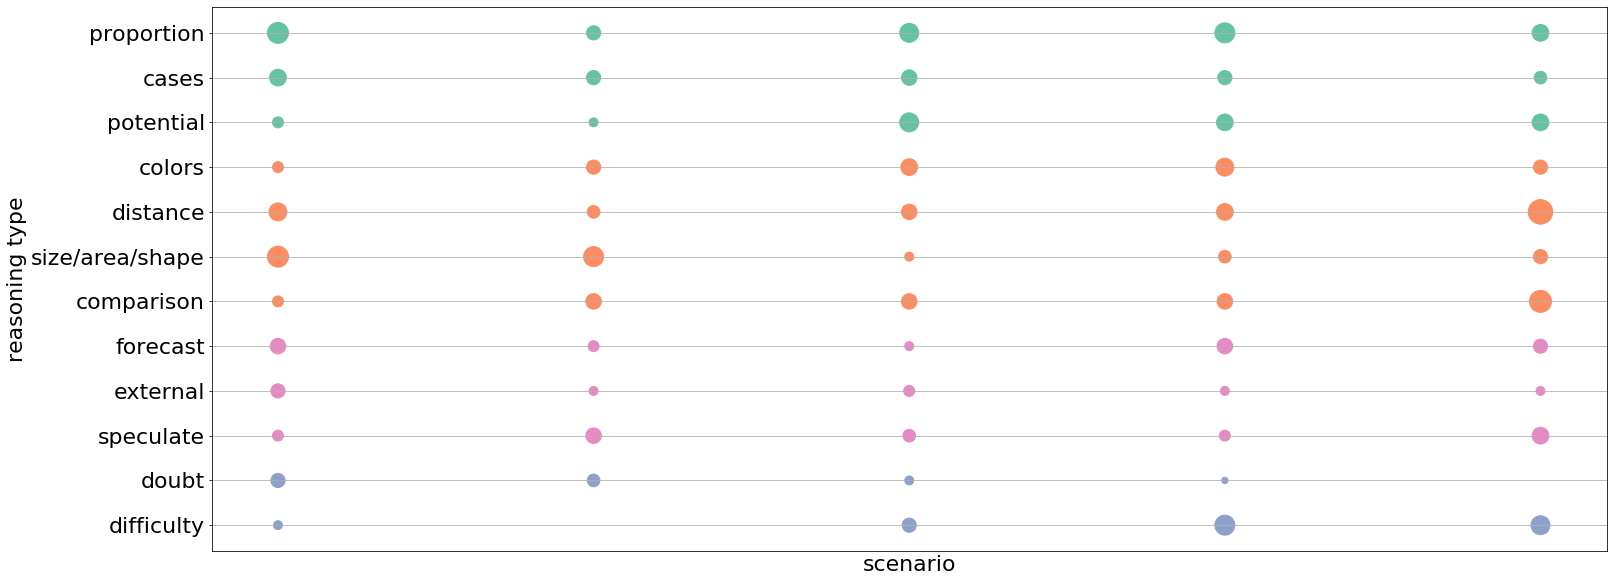

In [10]:
data_view = []
data_comment = []
data_count = []
colors = []
prob_color = '#66c2a5'
map_judgment_color = '#fc8d62'
difficulty_color = '#8da0cb'
default_color = '#e78ac3'

for scenario in ['b', 'c', 'e', 'f', 'g']:
    for comment in tags:#reasoning_data[view]:
        data_view.append(scenario)
        data_comment.append(comment)
        if comment in scenario_data[scenario].keys():
            data_count.append(scenario_data[scenario][comment]*40)
        else: 
            data_count.append(0)
        if comment == 'difficulty' or comment == 'doubt':
            colors.append(difficulty_color)
        elif comment == 'distance' or comment == 'size/area/shape' or comment == 'colors' or comment == 'comparison':
            colors.append(map_judgment_color)
        elif comment == 'proportion' or comment == 'potential' or comment == 'cases':
            colors.append(prob_color)
        else:
            colors.append(default_color)
            
plt.rcParams.update({'font.size': 22})       
plt.figure(figsize=(25, 10))
plt.grid(which='major', axis='y')
plt.xticks([])
plt.xlabel('scenario')
plt.ylabel('reasoning type')
plt.scatter(x=data_view, y=data_comment, s=data_count, c=colors)
plt.show()